# CLEAN AND ANALYZE EMPLOYEE EXIT SURVEYS

**In this project, we are going to work with exit surveys from empoyees of the Department of Education,Training Employment (DETE) and The technical and Further Education (TAFE)  Institute in Queensland, Australia.**click [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) to get TAFE data and [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) for DETE data**

**We will combine the two dataset DETE and TAFE to analyse people who resigned due to some kind of dissatisfaction.**
**Our goals therefore depend on these two**
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


## 1.1 Reading our data into pandas
We will first read the two dataset into pandas.The datasets are stored in csv file ```dete_survey.csv``` and ```tefe_survey.csv```

Remember we will as well import the pandas and numpy libraries

In [1]:
import pandas as pd
import numpy as np

#  let's read the two dataset

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")
 


## 1.2 Exploring the datasets

## a)DETE


In [3]:
dete_survey.head() # this prints out few rows

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.describe() #this prints out some information the dataframe

,ID
count,822.000000
mean,411.693431
std,237.705820
min,1.000000
25%,206.250000
50%,411.500000
75%,616.750000
max,823.000000


In [5]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

from the doutput above we can confirm that our dataframe(dete_survey) contain 822 entries and 56 columns, but we can also roughly say that business unit contains less entries compared to other columns.

In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

**We can confirm , there are over 25 entries column with NAN values, with some columns like Torress Strait with only two entries.**

## b) TAFE

In [7]:
tafe_survey.head() # display the first five rows

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
tafe_survey.describe() # this display statistcal information on columns with  numerical values

,Record ID,CESSATION YEAR
count,7.020000e+02,695.000000
mean,6.346026e+17,2011.423022
std,2.515071e+14,0.905977
min,6.341330e+17,2009.000000
25%,6.343954e+17,2011.000000
50%,6.345835e+17,2011.000000
75%,6.348005e+17,2012.000000
max,6.350730e+17,2013.000000


In [9]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

it's also clear that the dataframe contains alot of columns with missing values e.g employment type.employment

**From the dataframe we can conclude that:**

* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.

* Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.

* Each dataframe contains many of the same columns, but the column names are different.

* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## 1.3 fixing the missing values in dete_survey
we will again read ```dete_survey.csv``` csv file into pandas again, but this time read the not stated values as NAN
To do this we set the ```na_values``` parameter to ```Not stated ``` 

In [12]:
dete_survey = pd.read_csv("dete_survey.csv", na_values ="Not Stated")

## 1.4 dropping columns:
some columns are not helpfull to analysis, we'll therefore have to drop them.

* i.dete_survey , where we will drop from index [28:49] 
* ii.tafe_survey, where we will drop from index [17:66]


In [13]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

## 1.5 stardadizing and renaming the columns 

Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis

We'll  therefore use;  the ```DataFrame.columns``` attribute along with vectorized string methods to update all of the columns at once

**i. dete_survey_update**

In [14]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

# let's survey the current column

dete_survey_updated.columns


Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

from the output wee can confirm that columns' nams havebeen updated

**ii. tafe_survey_updated**
 in this dataframe we'll rename the columns

In [16]:
name = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification.  Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}


tafe_survey_updated.rename(columns=name, inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'Classification. Classification',
       'institute_service', 'role_service'],
      dtype='object')

From the above columns you can notice that some of the columns have been renamed.

## 1.6 Filter the data
Remember for this project, we'll only analyze survey respondents who resigned, so we'll only select separation types containing the string 'Resignation'.

In [17]:

# Check the unique values for the separationtype column
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [18]:
# Check the unique values for the separationtype column
dete_survey_updated['separationtype'].value_counts()



Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

From the above two output, we can confirm that, in TEFE there is only one value called ```Resignation``` while in DETE  we have ```Resignation-Other reasons```,```Resignation-Other employer```,```Resignation-Move overseas/interstate ```

so we need to update all seperation types containing the word ```resignation``` in DETE to ```Resignation```

In [19]:
# Update all separation types containing the word "resignation" to 'Resignation'

dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# Check the values in the separationtype column were updated correctly

dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

The output above has now confirmed that DETE now contain only one value called ```Resignation``` that is after being updated.

With the information, we will copy therefore the two dataframe to avoid the SettingWithCopy Warning

In [21]:
# Select only the resignation separation types from each dataframe
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

# Let's check few rows in each dataframe

print("Few rows in DETE")
dete_resignations.head()


Few rows in DETE


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [22]:
print("Few rows in TAFE")
tafe_resignations.head()

Few rows in TAFE


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,Classification. Classification,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


## 1.7 verify the data
Before we clean and manupulate the our data, we need to verify that the data doesn't contain any major inconsistencies.
we'll therefore focus on verifying that the years in the ```cease_date``` and ```dete_start_date``` columns make sense that is;
* under no circumstances we have years after the current date since the  ```cease_date``` is the last year of the person's employment and the ```dete_start_date``` is the person's first year of employment
* Also,given that most people in this field start working in their 20s, it's also unlikely that the ```dete_start_date``` was before the year 1940.

In [23]:
# let's check unique values in cease_date column

dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
09/2010      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

In [24]:
# we will now extract the years and convert the type to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [25]:
# we will now check unique values and look for the outliers in dete_start_date column
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [27]:
# unique values in cease_date column (tafe)
tafe_resignations['cease_date'].value_counts().sort_values()


2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

From the work we did in the last screen, we can verify:
* There aren't any major issues with the years.
* The years in each dataframe don't span quite the same number of years.

 Now that we've verified the years in the ```dete_resignation``` dataframe, we'll use them to create a new column.
 
 Just for refreshment, our end goal is to answer the following question:;
 * Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
 

## 1.8 working on years of service
The ```tafe_resignations``` dataframe already contains a "service" column, which we renamed to ```institute_service```. In order to analyze both surveys together, we'll have to create a corresponding ```institute_service``` column in ```dete_resignations```

Have a look.

In [29]:
# Calculate the length of time an employee spent in their respective workplace and create a new column
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [30]:

dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


The output above, contain a new added column (institute_service ) that we'll use to analyze survey respondents according to their length of employment.

## 1.9 Identify Dissatisfied Employees.


we'll now identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

1.   tafe_survey_updated

  *  Contributing Factors. Dissatisfaction
  *  Contributing Factors. Job Dissatisfaction
  
  
2.   dete_survey_updated

  *  job_dissatisfaction
  *  dissatisfaction_with_the_department
  *  physical_work_environment
  *  lack_of_recognition
  *  lack_of_job_security
  *  work_location
  *  employment_conditions
  *  work_life_balance
  *  workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

To create the new column, we'll do the following:

Convert the values in the ```Contributing Factors. Dissatisfaction``` and ```Contributing Factors. Job Dissatisfaction``` columns in the ```tafe_resignations``` dataframe to ```True```, ```False```, or ```NaN values```.
If any of the columns listed above contain a True value, we'll add a True value to a new column named ```dissatisfied```. To accomplish this, we'll use the ```DataFrame.any()``` method to do the following:

Return ```True``` if any element in the selected columns above is True

Return ```False``` if none of the elements in the selected columns above is True

Return ```NaN``` if the value is NaN

In [32]:
# let's have a quick look of unique values in each column in tafe df
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [33]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

## 2.0 update the values

 we will Update the values in the contributing factors columns to be either True, False, or NaN, we will therefore have to create a fuctions.

In [35]:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()


tafe_resignations_up['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

In [36]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [37]:
# working on dete df
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

To recap, we've accomplished the following:

*  Renamed our columns
*  Dropped any data not needed for our analysis
*  Verified the quality of our data
*  Created a new institute_service column
*  Cleaned the Contributing Factors columns
*  Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the institute_service column, so when we combine the data,we think about how to get the data into a form that's easy to aggregate.

## 2.1 combining the data

 let's first add a column to each dataframe that will allow us to easily distinguish between the two

In [39]:
dete_resignations_up['institute'] = 'DETE' # adding new column called where each row contain name called DETE
tafe_resignations_up['institute'] = 'TAFE' # adding new column called where each row contain name called DETE

# lets then combine the two data

combined = pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index = True)
combined.head()


,Classification. Classification,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,...,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006.0,Resignation,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1997.0,Resignation,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2008.0,Resignation,NaN,False,NaN,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False


## 2.2 dropping some columns
Remember that we still have some columns left in the dataframe that we don't need to complete our analysis. Use the DataFrame.dropna() method to drop any columns with less than 500 non null values

In [41]:
# let's check first the columns
combined.notnull().sum().sort_values(ascending=False)

id                                                     651
institute                                              651
separationtype                                         651
dissatisfied                                           643
cease_date                                             635
employment_status                                      597
age                                                    596
gender                                                 592
institute_service                                      563
WorkArea                                               340
Institute                                              340
Contributing Factors. Travel                           332
Contributing Factors. Study                            332
Contributing Factors. Other                            332
Contributing Factors. NONE                             332
Contributing Factors. Maternity/Family                 332
Contributing Factors. Job Dissatisfaction              3

From the output, we can see that most of the columns we need in our analysis have more than 500 non null values.we'll therefore set 500 as our threshold to drop  null values

In [42]:
combined_updated = combined.dropna(thresh=500, axis=1)
combined_updated.head(10)

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Resignation
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Resignation
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Resignation
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Resignation
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Resignation
5,36-40,2012.0,False,Permanent Full-time,Female,13.0,DETE,14,Resignation
6,31-35,2012.0,True,Permanent Full-time,Male,15.0,DETE,5,Resignation
7,61 or older,2012.0,True,Permanent Part-time,Male,17.0,DETE,NaN,Resignation
8,56-60,2012.0,False,Permanent Full-time,Male,21.0,DETE,30,Resignation
9,51-55,2012.0,False,Permanent Part-time,Female,22.0,DETE,32,Resignation


## 2.3 cleaning up the institute service column.
we'll have to clean up the ```institute_service```  after which we'll convert the numbers into categories that is;

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [43]:
# let's check first the unique values

combined_updated["institute_service"].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


In [44]:
# extracting the years of service from each value in the institute_service column after which we convert it to float

combined_updated["institute_service"] = combined_updated["institute_service"].astype('str').str.extract(r'(\d+)')
combined_updated["institute_service"] = combined_updated["institute_service"].astype("float")
combined_updated["institute_service"].value_counts(dropna = False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

In [45]:
# We'll Create a function that maps each year value to one of the career stages 

def stages (val):
    if val < 3:
        return "New"
    elif val >= 3 and val <= 6:
        return "Experienced"
    elif val > 6 and val < 10:
        return "Established"
    elif pd.isnull(val):
        return np.nan
    else:
        return "veteran"
# let's apply our function to the column institute_service
# we have to create new column called service cat.

combined_updated["service_cat"] = combined_updated["institute_service"].apply(stages)

# let's check the unique values in this our new column.

combined_updated["service_cat"].value_counts(dropna = False)



/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


New            193
Experienced    172
veteran        142
NaN             88
Established     56
Name: service_cat, dtype: int64

In the last code, we created a ```service_cat column```, that categorizes employees according to the amount of years spent in their workplace.


## 2.4 filling out the missing values.
We will now check at the ```dissatisfied``` column to find out the missing values.For our analysis, we will replace the null values to the most values that occurs frequently in this column(```dissatisfied```) either True or False

In [46]:
combined_updated["dissatisfied"].value_counts()

False    403
True     240
Name: dissatisfied, dtype: int64

In [47]:
# false is the most frequent value

combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)
combined_updated["dissatisfied"].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


False    411
True     240
Name: dissatisfied, dtype: int64

The above output confirms that 8 null values has been replace by False values,rising the number of False values to 411.

## 2.5 Working on Dissatisfied in each category

Since  we have all the values for dissatisfied people, we can use pivot table method to find number of dissatisfied people in each service category after which, we find the mean of them.


In [49]:
cat_table = combined_updated.pivot_table(index = "service_cat", values = "dissatisfied")
cat_table

,dissatisfied
service_cat,
Established,0.553571
Experienced,0.343023
New,0.295337
veteran,0.471831


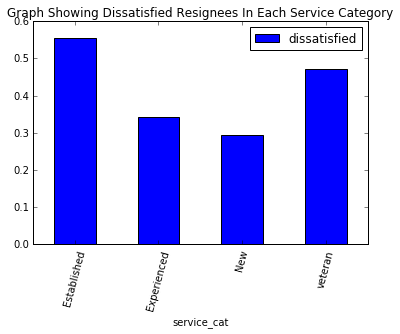

In [50]:
# with the table, we can now plot the graph

%matplotlib inline    

cat_table.plot(kind = "bar" ,rot = 75, title = "Graph Showing Dissatisfied Resignees In Each Service Category")


## Conclusion
 From our analysis, can conclude that, Established employees that is with seven or more years of service are more likely to resign due to some kind of dissatisfaction compared to those with less than 7 years.